Import all necessary libraries-
Tensorflow,
Numpy,
Matplotlib,
CV2.

In [25]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


Loads the MNIST dataset.

In [26]:
dataset = tf.keras.datasets.mnist

Load data.

In [27]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

Divide Training and Testing data

In [28]:
X_train= X_train/255.0
X_test= X_test/255.0

Reshape Train and Test data

In [29]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Import Sequential, Dense, Dropout from keras models


In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

The Model

In [31]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Compile the Model

In [32]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

Epoch is the date and time relative to which a computer's clock and timestamp values are determined.
Here, Epochs is 3

In [33]:
model.fit(X_train, y_train, epochs=3, batch_size=12, validation_split=0.1)

Epoch 1/3
4500/4500 [==============================] - 13s 3ms/step - loss: 0.2881 - acc: 0.9127 - val_loss: 0.1054 - val_acc: 0.9692
Epoch 2/3
4500/4500 [==============================] - 12s 3ms/step - loss: 0.1512 - acc: 0.9540 - val_loss: 0.1008 - val_acc: 0.9710
Epoch 3/3
4500/4500 [==============================] - 12s 3ms/step - loss: 0.1193 - acc: 0.9628 - val_loss: 0.0859 - val_acc: 0.9747


Plotting an example value using matplotlib.pyplot and predicting the result.

313/313 [==============================] - 1s 2ms/step


Text(0, 0.5, '9')

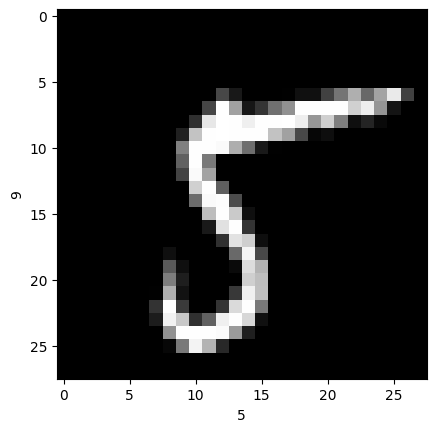

In [42]:
plt.imshow(X_test[1550].reshape(28,28), cmap='gray')
plt.xlabel(y_test[1550])
plt.ylabel(np.argmax(model.predict(X_test)[1255]))

Save the model with '.h5' extention

In [35]:
model.save('digit_trained.h5')

Code for capturing the webcam using CV2 videocapture.
video capture value is ->1 for secondary webcam.

In [36]:
cap = cv2.VideoCapture(1)
while True:
    ret, img = cap.read()
    #img = cv2.flip(img, 1)
    img = img[200:400, 200:400]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow("gray_wind", gray)
    gray = cv2.resize(gray, (28, 28))
    #cv2.imshow('resized')
    gray = gray.reshape(1, 784)
    result = np.argmax(model.predict(gray))
    result = 'cnn : {}'.format(result)
    cv2.putText(img, org=(25,25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=2)
    cv2.imshow("image", img)
   
    if cv2.waitKey(33) == ord('a'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 19ms/step


THE END :)